In [1]:
# Load packages 
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

In [4]:
# start Spark Session
from pyspark.sql import SparkSession
app_name = "project"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import col
sqlContext = SQLContext(sc)

First, load the data 

In [5]:
df = sqlContext.read.format("csv") \
               .option("inferSchema", "true") \
               .option("header", "false") \
               .option("delimiter", "\t")\
               .load("sample_training.txt")

In [6]:
df = df.withColumnRenamed("_c0", "CTR") \
       .withColumnRenamed("_c1", "NumVar1") \
       .withColumnRenamed("_c2", "NumVar2") \
       .withColumnRenamed("_c3", "NumVar3") \
       .withColumnRenamed("_c4", "NumVar4") \
       .withColumnRenamed("_c5", "NumVar5") \
       .withColumnRenamed("_c6", "NumVar6") \
       .withColumnRenamed("_c7", "NumVar7") \
       .withColumnRenamed("_c8", "NumVar8") \
       .withColumnRenamed("_c9", "NumVar9") \
       .withColumnRenamed("_c10", "NumVar10") \
       .withColumnRenamed("_c11", "NumVar11") \
       .withColumnRenamed("_c12", "NumVar12") \
       .withColumnRenamed("_c13", "NumVar13") \
        .withColumnRenamed("_c14", "NumVar14") \
        .withColumnRenamed("_c15", "NumVar15") \
        .withColumnRenamed("_c16", "NumVar16") \
        .withColumnRenamed("_c17", "NumVar17") \
        .withColumnRenamed("_c18", "NumVar18") \
        .withColumnRenamed("_c19", "NumVar19") \
        .withColumnRenamed("_c20", "NumVar20") \
        .withColumnRenamed("_c21", "NumVar21") \
        .withColumnRenamed("_c22", "NumVar22") \
        .withColumnRenamed("_c23", "NumVar23") \
        .withColumnRenamed("_c24", "NumVar24") \
        .withColumnRenamed("_c25", "NumVar25") \
        .withColumnRenamed("_c26", "NumVar26") \
        .withColumnRenamed("_c27", "NumVar27") \
        .withColumnRenamed("_c28", "NumVar28") \
        .withColumnRenamed("_c29", "NumVar29") \
        .withColumnRenamed("_c30", "NumVar30") \
        .withColumnRenamed("_c31", "NumVar31") \
        .withColumnRenamed("_c32", "NumVar32") \
        .withColumnRenamed("_c33", "NumVar33") \
        .withColumnRenamed("_c34", "NumVar34") \
        .withColumnRenamed("_c35", "NumVar35") \
        .withColumnRenamed("_c36", "NumVar36") \
        .withColumnRenamed("_c37", "NumVar37") \
        .withColumnRenamed("_c38", "NumVar38") \
        .withColumnRenamed("_c39", "NumVar39")


#df.select("*").show(5)
df.select("CTR", "NumVar1", "NumVar2", "NumVar3", "NumVar4", "NumVar5", "NumVar6", "NumVar7", "NumVar8", "NumVar9", "NumVar10", "NumVar11", "NumVar12", "NumVar13").show()




+---+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+
|CTR|NumVar1|NumVar2|NumVar3|NumVar4|NumVar5|NumVar6|NumVar7|NumVar8|NumVar9|NumVar10|NumVar11|NumVar12|NumVar13|
+---+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+
|  0|      0|      1|   null|      0|  16597|    557|      3|      5|    123|       0|       1|    null|       1|
|  0|      1|      0|      1|   null|   1427|      3|     16|     11|     50|       0|       2|       1|    null|
|  0|   null|      1|   null|   null|  23255|   null|      0|      1|     73|    null|       0|    null|    null|
|  0|      0|     37|     23|      9|   1635|     84|      2|     17|    109|       0|       2|    null|      50|
|  0|      2|      0|      9|      5|     44|      5|      2|      4|      5|       2|       2|    null|       5|
|  0|      0|      1|     14|      2|    120|    733|      0|     12|    606|       0|  

In [7]:
df.select('NumVar14','NumVar15','NumVar16','NumVar17','NumVar18','NumVar19','NumVar20','NumVar21',
          'NumVar22','NumVar23','NumVar24','NumVar25','NumVar26','NumVar27','NumVar28','NumVar29').show()


+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|NumVar14|NumVar15|NumVar16|NumVar17|NumVar18|NumVar19|NumVar20|NumVar21|NumVar22|NumVar23|NumVar24|NumVar25|NumVar26|NumVar27|NumVar28|NumVar29|
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|8cf07265|7cd19acc|77f2f2e5|d16679b9|4cf72387|fbad5c96|8fb24933|0b153874|a73ee510|0095a535|3617b5f5|9f32b866|428332cf|b28479f6|83ebd498|31ca40b6|
|05db9164|26a88120|615e3e4e|2788fed8|4cf72387|7e0ccccf|3f4ec687|0b153874|a73ee510|0e9ead52|c4adf918|f5d19c1c|85dbe138|07d13a8f|24ff9452|1034ac0d|
|7e5c2ff4|d833535f|b00d1501|d16679b9|25c83c98|7e0ccccf|65c53f25|1f89b562|a73ee510|3b08e48b|ad2bc6f4|e0d76380|39ccb769|b28479f6|a733d362|1203a270|
|05db9164|9b25e48b|2d9b2559|96302ef8|43b19349|fbad5c96|e64ca89e|5b392875|a73ee510|3b76bfa9|87bb382c|3d899a5a|d95a2a6d|8ceecb

In [8]:
df.select('NumVar30','NumVar31','NumVar32','NumVar33','NumVar34','NumVar35','NumVar36','NumVar37','NumVar38','NumVar39').show()


+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|NumVar30|NumVar31|NumVar32|NumVar33|NumVar34|NumVar35|NumVar36|NumVar37|NumVar38|NumVar39|
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|e5ba7672|d0e5eb07|    null|    null|dfcfc3fa|ad3062eb|32c7478e|aee52b6f|    null|    null|
|3486227d|b486119d|    null|    null|63580fba|    null|32c7478e|2a90c749|    null|    null|
|776ce399|281769c2|    null|    null|73d06dde|    null|32c7478e|aee52b6f|    null|    null|
|07c540c4|7d8c03aa|fbf39fb5|a458ea53|0c61029b|    null|32c7478e|216a829e|001f3601|abc00283|
|07c540c4|e261f8d8|21ddcdc9|b1252a9d|31b4af04|    null|32c7478e|8d653a3e|445bbe3b|32280082|
|8efede7f|97029569|21ddcdc9|b1252a9d|6ec2bcf7|    null|55dd3565|7f686ab3|2bf691b1|bebc2875|
|2005abd1|0f4a15b0|    null|    null|0014c32a|    null|55dd3565|3b183c5c|    null|    null|
|e5ba7672|bc48b783|    null|    null|0014c32a|c9d4222a|55dd3565|3b183c5c|    nul

In [9]:
df.printSchema()

# Dumb question, but would this mean the string columns = categorical? 
# So we have 13 integer values 
# And then the remaining 26 are categorical? 

root
 |-- CTR: integer (nullable = true)
 |-- NumVar1: integer (nullable = true)
 |-- NumVar2: integer (nullable = true)
 |-- NumVar3: integer (nullable = true)
 |-- NumVar4: integer (nullable = true)
 |-- NumVar5: integer (nullable = true)
 |-- NumVar6: integer (nullable = true)
 |-- NumVar7: integer (nullable = true)
 |-- NumVar8: integer (nullable = true)
 |-- NumVar9: integer (nullable = true)
 |-- NumVar10: integer (nullable = true)
 |-- NumVar11: integer (nullable = true)
 |-- NumVar12: integer (nullable = true)
 |-- NumVar13: integer (nullable = true)
 |-- NumVar14: string (nullable = true)
 |-- NumVar15: string (nullable = true)
 |-- NumVar16: string (nullable = true)
 |-- NumVar17: string (nullable = true)
 |-- NumVar18: string (nullable = true)
 |-- NumVar19: string (nullable = true)
 |-- NumVar20: string (nullable = true)
 |-- NumVar21: string (nullable = true)
 |-- NumVar22: string (nullable = true)
 |-- NumVar23: string (nullable = true)
 |-- NumVar24: string (nullable = t

# Major scratchwork: (to be cleaned up as needed) 

for reference: how to use SQLContext tutorial 
* https://www.analyticsvidhya.com/blog/2016/10/spark-dataframe-and-operations/


Looking at just click through rate 0's and 1's: it looks like we have fewer 0's than 1's 

In [10]:
# CTR = "Click through Rate" (0 or 1) 

df.filter(col("CTR") == 1).count()

587833

In [11]:
df.filter(col("CTR") == 0).count()
# Intuitively this makes sense? Most people probably won't click on ads unless there's a compelling reason to. 

1704204

In [12]:
# Quick sum to know how many input rows we are working with 
587833+1704204 #roughly a 25% click through rate!? 

2292037

(One quick note: We could probably bootstrap to calculate rough estimates of what the imbalance is.) 

Can we look at coverage of these columns (even though we have no idea what they mean)? 
* I want to see which columns have the most NaN values 

In [16]:
#df.agg(*[
#    count(c).alias(c)    # vertical (column-wise) operations in SQL ignore NULLs
#    for c in df.columns
#]).show()

# reference https://stackoverflow.com/questions/33900726/count-number-of-non-nan-entries-in-each-column-of-spark-dataframe-with-pyspark
from pyspark.sql.functions import col, count, isnan, lit, sum


df.agg(*[
    (count(c)/2292037).alias(c)    # vertical (column-wise) operations in SQL ignore NULLs
    for c in df.columns
]).show()

+---+------------------+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+--------+--------+------------------+------------------+--------+------------------+--------+--------+--------+--------+--------+------------------+--------+--------+--------+------------------+--------+--------+------------------+------------------+------------------+------------------+--------+------------------+------------------+------------------+
|CTR|           NumVar1|NumVar2|           NumVar3|           NumVar4|           NumVar5|          NumVar6|           NumVar7|           NumVar8|           NumVar9|          NumVar10|          NumVar11|           NumVar12|          NumVar13|NumVar14|NumVar15|          NumVar16|          NumVar17|NumVar18|          NumVar19|NumVar20|NumVar21|NumVar22|NumVar23|NumVar24|          NumVar25|NumVar26|NumVar

In [14]:
from pyspark.sql.functions import col, count, isnan, lit, sum
coverage = df.agg(*[
    (count(c)/2292037).alias(c)    # vertical (column-wise) operations in SQL ignore NULLs
    for c in df.columns
]).toPandas()

In [15]:
coverage_summary = coverage.T
coverage_summary.columns = ['Coverage_nonNull']
coverage_summary.sort_values(by='Coverage_nonNull', ascending=False)

,Coverage_nonNull
CTR,1.000000
NumVar14,1.000000
NumVar36,1.000000
NumVar31,1.000000
NumVar30,1.000000
NumVar28,1.000000
NumVar27,1.000000
NumVar26,1.000000
NumVar24,1.000000
NumVar23,1.000000


So it looks like most of our columns (variables) have pretty good coverage save for: 
* NumVar32 
* NumVar33
* NumVar38
* NumVar39
* NumVar10
* NumVar1
* NumVar35 
* NumVar12 

Something worth thinking about: 
* https://www.csie.ntu.edu.tw/~r01922136/slides/kaggle-avazu.pdf : concatenating certain columns together to get a 'user', or condense certain columns together to get fewer features 

In [16]:
# Out of curiosity, which categorical columns have the most distinct values? 
# Note: countDistinct does not count NULL as a distinct value (but i'm fine with that for now)

from pyspark.sql.functions import countDistinct

distinctcount_byCol = df.agg(*[
    countDistinct(c).alias(c) for c in df.columns
]).toPandas()

distinctcount_df = distinctcount_byCol.T
distinctcount_df.columns=['count_distinct']
distinctcount_df.sort_values(by='count_distinct', ascending=True)

# Previous columns that had poor coverage (i.e. the most NULLs)
# NumVar32: 56% coverage - actually only has 1958 distinct values -> this is interesting; only half coverage, but quite high on distinct values 
# NumVar33: 56% coverage - actually only has 3 distinct values 
# NumVar38: 56% coverage - actually only has 82 distinct values 
# NumVar39: 56% coverage - has 47491 distinct values
# NumVar10: 55% coverage - actually only has 9 distinct values 
# NumVar1: 55% coverage - actually only has 334 distinct values 
# NumVar35: 24% coverage - actually only has 14 distinct values 
# NumVar12: 23% coverage - actually only has 194 distinct values 

# This would make sense (Sort of): Less coverage you have = such a column is perhaps rare 
# (but for those that do have the feature, will probably repeat in value)


,count_distinct
CTR,2
NumVar33,3
NumVar22,3
NumVar10,9
NumVar30,10
NumVar35,14
NumVar36,15
NumVar19,15
NumVar27,26
NumVar38,82


In [8]:
# We do see quite a few repeats of values in categorical variables (columns NumVar14 to NumVar39 )
# is it possible to see which ones generally are associated with 1's or 0's in CTR? 

# This is like a word count...sort of 

#ctr1 = df.filter(col("CTR") == 1)
#ctr1.groupby('NumVar14').sum('CTR').collect()[0][0] #gives you the value in the column 
# ctr1.groupby('NumVar14').sum('CTR').collect()[0][1] #gives you the count 

# df.columns[14:] list of columns 

#ctr0 = df.filter(col("CTR")==0)
#ctr0.groupby('NumVar14').count().collect()[0][0]

def get_count_values_by_col(df, column_name): 
    ctr_1 = df.filter(col("CTR") == 1) 
    total_ctr1 = ctr_1.count()
    labelled1_list = ctr_1.groupby(column_name).sum('CTR').collect()
    labelled1_output = []
    for i in range(0, len(labelled1_list)): 
        labelled1_output.append({'value': labelled1_list[i][0], 'pctage':labelled1_list[i][1]/total_ctr1*100})
    ctr_0 = df.filter(col("CTR")==0)
    total_ctr0 = ctr_0.count()
    labelled0_list = ctr_0.groupby(column_name).count().collect() 
    labelled0_output = []
    for j in range(0, len(labelled0_list)): 
        labelled0_output.append({'value': labelled0_list[j][0], 'pctage':labelled0_list[j][1]/total_ctr0*100})
    return(pd.DataFrame(labelled1_output), pd.DataFrame(labelled0_output))

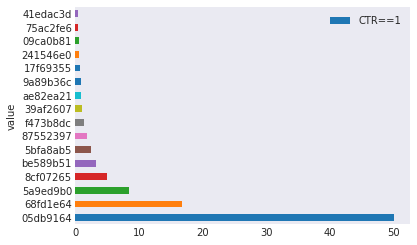

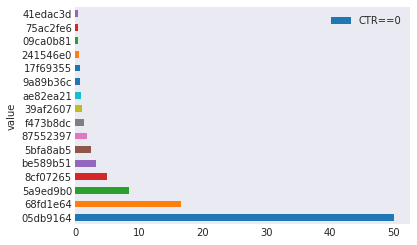

In [9]:
# 2 subplots per column. 
# len(df.columns[14:]) -> there are 26 columns 

################
# Num Var 14
################

plotting_col = 'NumVar14'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [21]:
# can we see the cumulative summation  of the top 15 variables for NumVar14? 
np.nansum(sub_ex1['pctage']) #94% 
np.nansum(sub_ex0['pctage']) #94%  
# Even with the top 15 variables, we already get pretty good coverage 
# NumVar14 is a good candidate for just coding up one hot encoding for top 15 

94.1388472272099

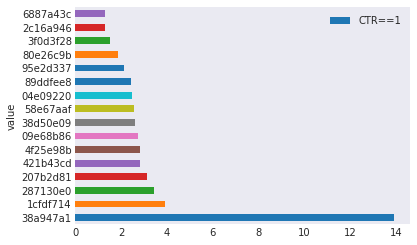

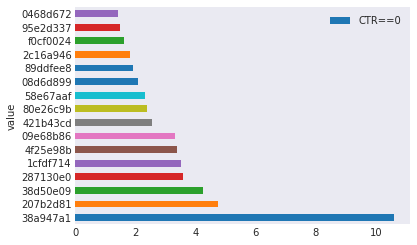

In [22]:
############
# Num Var 15 
############

plotting_col = 'NumVar15'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [32]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:200]['pctage']) #95%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:200]['pctage']) #95% 
# It takes over 200 most frequent values just to get 95% Coverage for NumVar15 

95.63447441705382

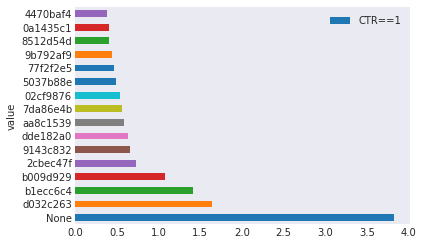

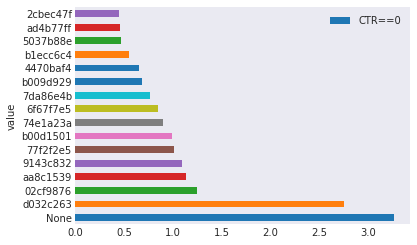

In [33]:
plotting_col = 'NumVar16'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [41]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage']) #58%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage']) #60% 
# NumVar16 has too many distinct values 

60.31889374746215

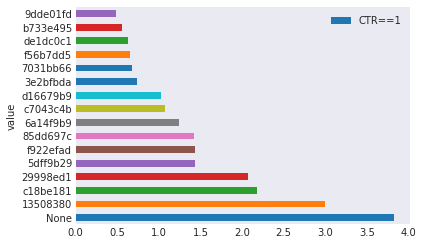

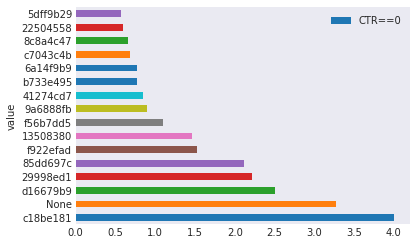

In [42]:
plotting_col = 'NumVar17'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [52]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage']) #82%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage']) #81% 

81.17191369108392

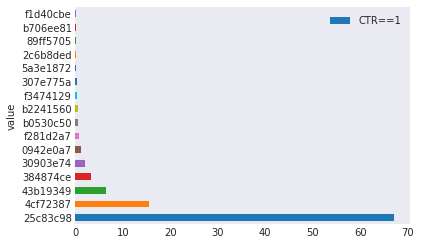

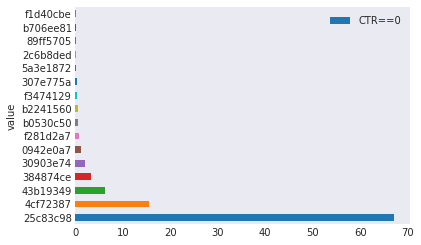

In [53]:
plotting_col = 'NumVar18'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [54]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]['pctage']) #98%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]['pctage']) #98% 

98.9273584617804

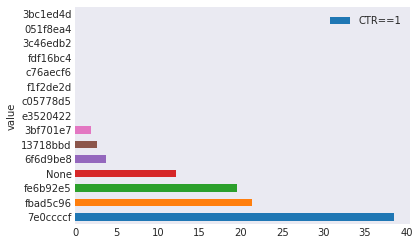

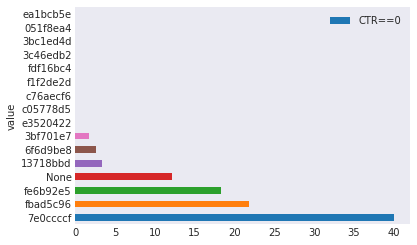

In [55]:
plotting_col = 'NumVar19'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [56]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]['pctage'])
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]['pctage']) 
# Very few values in NumVar19 

100.00000000000001

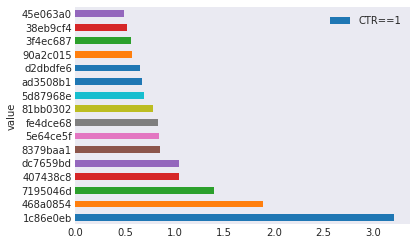

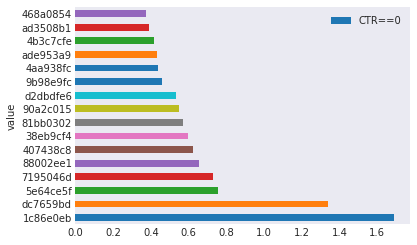

In [58]:
plotting_col = 'NumVar20'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [63]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5000]['pctage']) #96%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5000]['pctage']) #94%
# But notice that the percentage differences between the two categories of CTR == 0 vs CTR == 1 

94.5135089461121

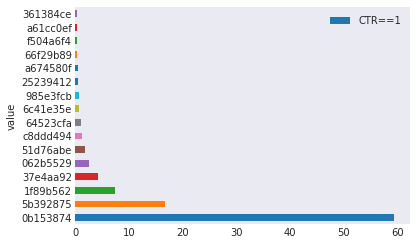

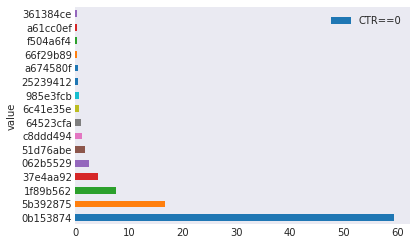

In [64]:
plotting_col = 'NumVar21'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [ ]:
# Without looking, we know that top 15 more or less already covers most of the categories for CTR == 0 or 1 
# Distributions look exactly the same...

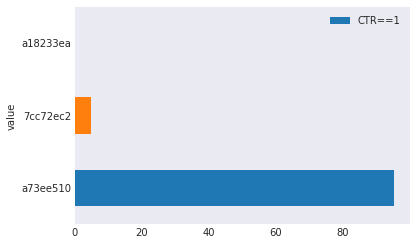

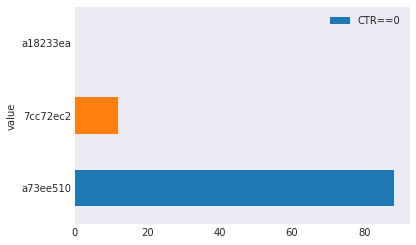

In [65]:
plotting_col = 'NumVar22'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [ ]:
# Without calculating, we would know that 3 values = more than enough to capture all the frequency 
# However, it looks like 2nd most common value (7cc72ec2) has some proportion variation between CTR == 0 and CTR == 1 

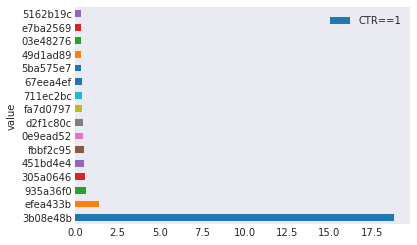

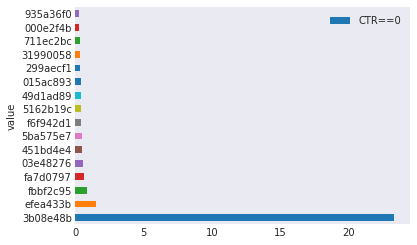

In [66]:
plotting_col = 'NumVar23'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [73]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:9000]['pctage']) #95%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage']) #95% 

95.45177689994857

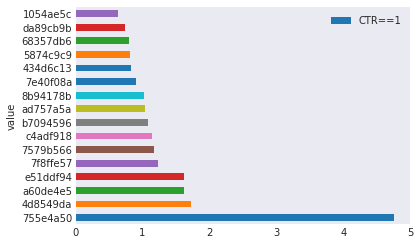

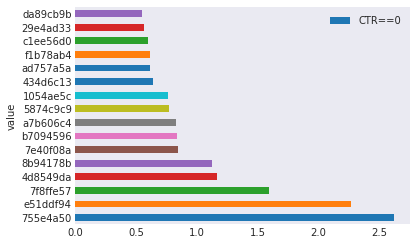

In [74]:
plotting_col = 'NumVar24'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [81]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:2000]['pctage']) #95%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:2000]['pctage']) #93%

93.73537440353385

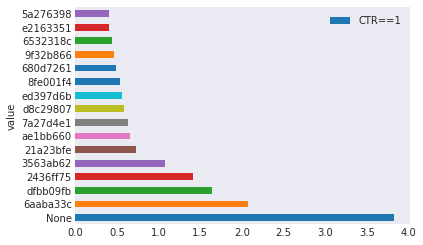

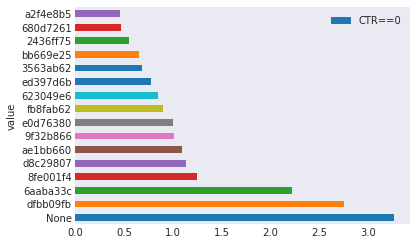

In [82]:
plotting_col = 'NumVar25'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [86]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:40000]['pctage'])
#np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage'])

71.24948752451799

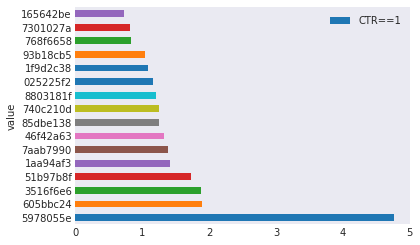

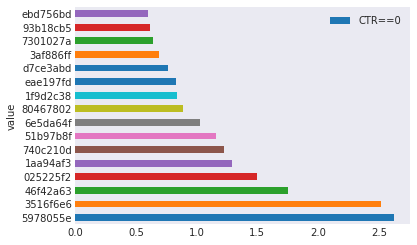

In [87]:
plotting_col = 'NumVar26'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [90]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:1000]['pctage']) #90%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:1000]['pctage']) #87%

87.14132815085519

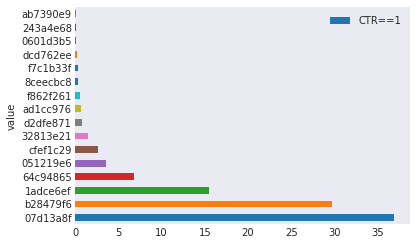

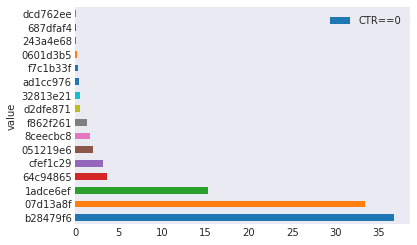

In [91]:
plotting_col = 'NumVar27'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [99]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:6]['pctage']) #96%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:6]['pctage']) #96%

96.03322137490582

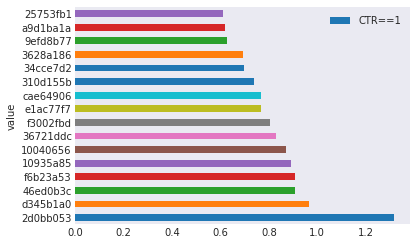

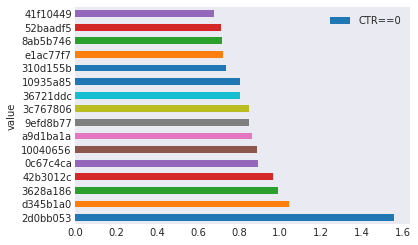

In [100]:
plotting_col = 'NumVar28'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [104]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:2000]['pctage']) #93.5
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:2000]['pctage']) #93.4

93.41733736102016

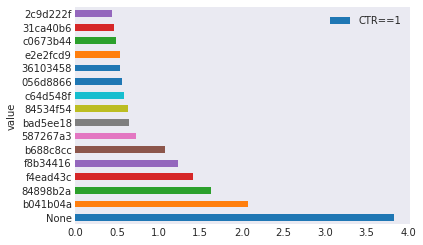

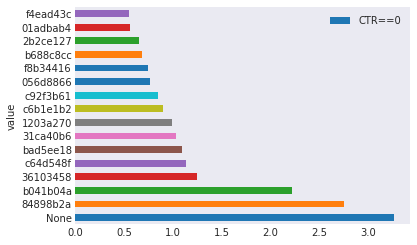

In [105]:
plotting_col = 'NumVar29'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [110]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:90000]['pctage'])
#np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage'])

87.76574299163197

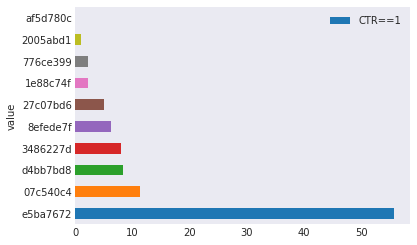

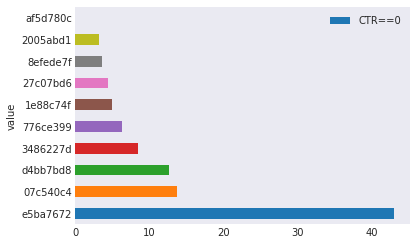

In [111]:
plotting_col = 'NumVar30'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [115]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5]['pctage']) #94%
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5]['pctage']) #94%

94.48040514908145

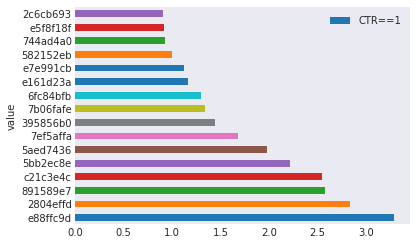

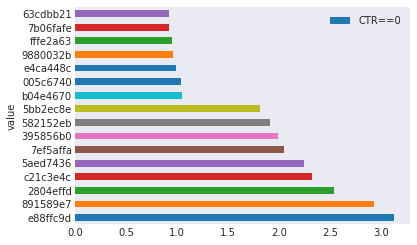

In [116]:
plotting_col = 'NumVar31'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [123]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:900]['pctage']) #94%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:900]['pctage']) #95%

95.24921899021477

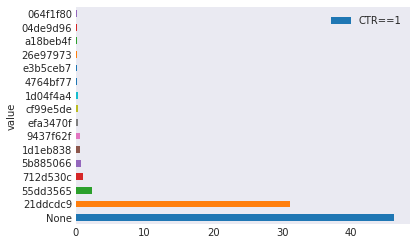

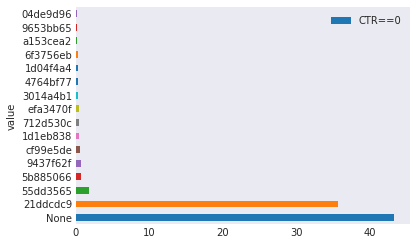

In [124]:
plotting_col = 'NumVar32'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [130]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:200]['pctage']) #95%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:200]['pctage']) #95%

95.39890764251227

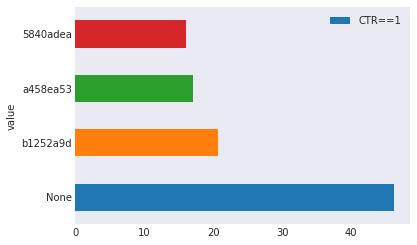

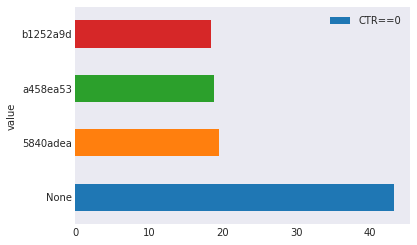

In [131]:
plotting_col = 'NumVar33'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [132]:
# Without inspecting, we know there's very few categories that make more than enough for frequency 
# The order of frequency categories is different, however. 

100.0

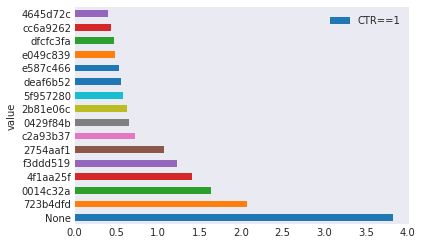

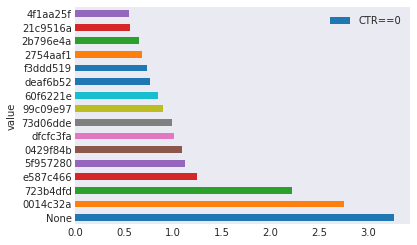

In [133]:
plotting_col = 'NumVar34'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [140]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:90000]['pctage']) #83
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:90000]['pctage']) #78.9

78.98320858301003

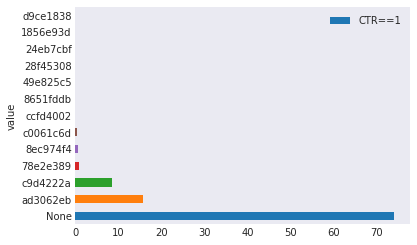

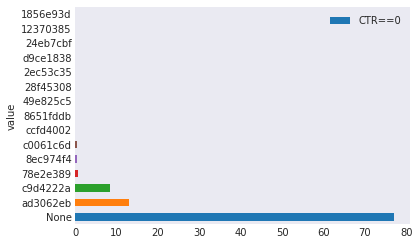

In [141]:
plotting_col = 'NumVar35'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [143]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5]['pctage']) #99%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5]['pctage']) #99%

99.9433753236115

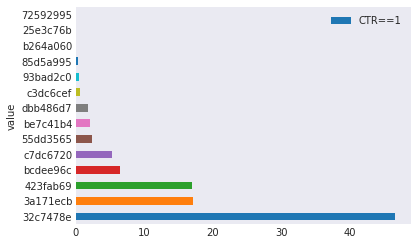

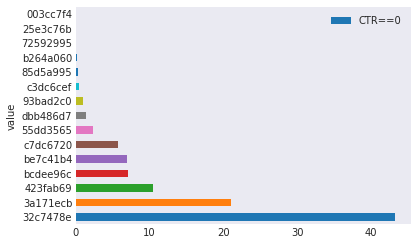

In [144]:
plotting_col = 'NumVar36'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [146]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5]['pctage']) #94%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:5]['pctage']) #94% 

94.30525922952886

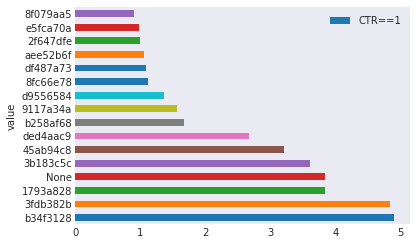

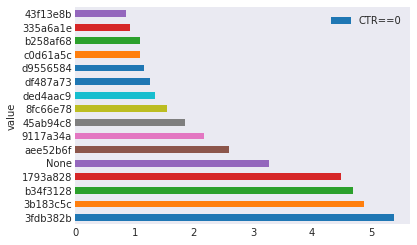

In [147]:
plotting_col = 'NumVar37'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [151]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage']) #95%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10000]['pctage']) #94%

94.47079105553092

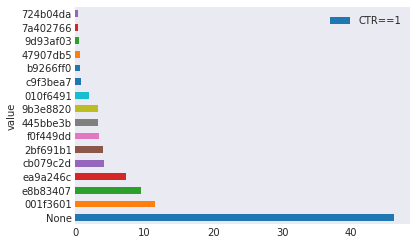

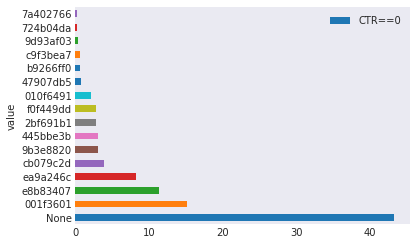

In [152]:
plotting_col = 'NumVar38'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [156]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10]['pctage']) #95%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:10]['pctage']) #96% 

96.41427904171098

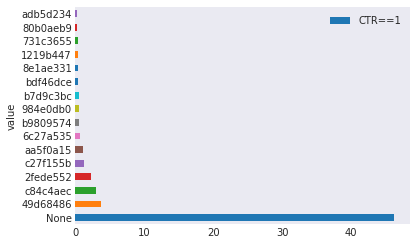

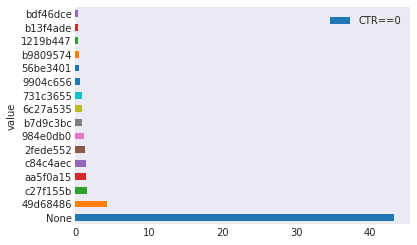

In [157]:
plotting_col = 'NumVar39'
ex1, ex0 = get_count_values_by_col(df, plotting_col) 
#fig, axes = plt.subplots(nrows=2, ncols=1)
sub_ex1 = ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex1.plot.barh(x='value', y='pctage', label='CTR==1')
#ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[0]) 
sub_ex0 = ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15]
sub_ex0.plot.barh(x='value',y='pctage', label='CTR==0')
#ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:15].plot.barh(x='value', y='pctage', ax=axes[1])

In [161]:
np.nansum(ex1.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:8000]['pctage']) #96%
np.nansum(ex0.sort_values(by='pctage', ascending=False).reset_index(drop=True).loc[0:8000]['pctage']) #95%

95.98968198642886

Scratchnotes: 

Categorical columns that look like there's no difference between labels of 1 vs 0 : 
* NumVar14 (few enough to have frequency in top 15) - full coverage 
* NumVar18 (few enough to have frequency in top 15) - full coverage 
* NumVar19 (few enough to have frequency in top 15) - 85% coverage
* NumVar21 (few enough to have frequency in top 15) - full coverage 
* NumVar35 (few enough to have frequency in top 15) - 23% coverage 
* NumVar38 (few enough to have frequency in top 15) - 55% coverage 

Categorical columns that have many features (will need some sort of reduction in dimensionality to get useful info): 
* NumVar15 (many distinct values) - full coverage 
* NumVar16 (too many distinct values) - 97% coverage 
* NumVar17 (too many distinct values) - 97% coverage 
* NumVar23 (too many distinct values) - full coverage
* NumVar25 (Too many distinct values) - 97% coverage 
* NumVar29 (too many distinct values) - 97% coverage 
* NumVar34 (Too many distinct values) - 97% coverage 
* NumVar39 (Too many distinct values) - 56% coverage

Strong hope: (enough distinction by eye, and reasonable amount of features)
* NumVar20 - full coverage
* NumVar22 - full coverage 
* NumVar24 - full coverage 
* NumVar26 - full coverage
* NumVar27 - full coverage
* NumVar28 - full coverage 
* NumVar30 - full coverage
* NumVar31 - full coverage
* NumVar32 - 56% Coverage 
* NumVar33 - 56% Coverage 
* NumVar36 - full coverage 
* NumVar37 - 97% coverage 


To get a sense of correlation, I'm going to calculate Cramer's V with bias adjustments (https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix). This is essentially just a cross-tabulation between categories, and Cramer's V is a correlation metric between categories (https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V). 

In [7]:
data_rdd = df.rdd
# convert to RDD for easy map/reduce 

In [180]:
# Using NumVar22 as an example since it only has 3 distinct values 
data_rdd.map(lambda x: (x['CTR'],(x['NumVar22'],1))).take(5)

[(0, ('a73ee510', 1)),
 (0, ('a73ee510', 1)),
 (0, ('a73ee510', 1)),
 (0, ('a73ee510', 1)),
 (0, ('a73ee510', 1))]

In [63]:
contingency_values=data_rdd.map(lambda x: ((x['CTR'],x['NumVar14']),1)) \
    .reduceByKey(lambda x,y: x+y) \
    .map(lambda x: ((x[0][0],x[0][1]),x[1])).collect()

In [64]:
# unwrap contingency values into dataframe 
# rows indexed by values 
# SCratchwork; please ignore

blahtest = []
for i in range(0, len(contingency_values)): 
    item = contingency_values[i]
    ctr_value = item[0][0] #CTR
    cat_value = item[0][1] #category value
    count_value = item[1] # count 
    blahtest.append({'ctr': ctr_value, 'category': cat_value, 'count': count_value})

In [65]:
# Scratchwork; please ignore
blahtest_df = pd.DataFrame(blahtest)[['ctr','category','count']].sort_values(by=['category','ctr']).reset_index(drop=True)
blahtest_df.head()

,ctr,category,count
0,0,000d72dd,30
1,1,000d72dd,11
2,0,003f4253,6
3,1,003f4253,1
4,0,00c2e152,1


In [48]:
blahtest_df['category'].drop_duplicates().values

array(['7cc72ec2', 'a18233ea', 'a73ee510'], dtype=object)

In [66]:
matr = pd.DataFrame(0, columns = blahtest_df['category'].drop_duplicates().values, index = blahtest_df['ctr'].drop_duplicates().values)
for index, row in blahtest_df.iterrows(): 
    matr.loc[row['ctr'], row['category']]=row['count']


In [67]:
matr #contingency table 

,000d72dd,003f4253,00c2e152,010e5266,0121ecd4,013c8fe1,015405ad,0158c7d2,021fab0d,024d3a13,...,ff004ae3,ff13a097,ff2f83a4,ff598947,ff5f3ab9,ff7a194c,ffa589b8,ffca49ea,ffdd8052,ffe3cd83
0,30,6,1,4,10,6,2,4,3,3,...,489,1,1,12,184,2,12,1,2,7
1,11,1,1,1,4,2,2,0,1,2,...,143,0,0,9,69,0,7,0,0,3


In [68]:
test_r, test_k = matr.shape

In [69]:
test_rowsums = matr.sum(axis=1) 
test_colsums = matr.sum(axis=0)

In [70]:
test_colsums['000d72dd']

41

In [71]:
matr.columns

Index(['000d72dd', '003f4253', '00c2e152', '010e5266', '0121ecd4', '013c8fe1',
       '015405ad', '0158c7d2', '021fab0d', '024d3a13',
       ...
       'ff004ae3', 'ff13a097', 'ff2f83a4', 'ff598947', 'ff5f3ab9', 'ff7a194c',
       'ffa589b8', 'ffca49ea', 'ffdd8052', 'ffe3cd83'],
      dtype='object', length=1407)

In [19]:
#####
# Actual functions 
#####


# calculate cramer's V: 

def cramers_corrected_stat(confusion_matrix): 
    # get total n 
    n = np.nansum(confusion_matrix.sum()) 
    # get r,k (shape), where r = number of rows, k = number of columns 
    r,k = confusion_matrix.shape 
    # get chi-2 statistic
    chi2 = 0
    row_sums = confusion_matrix.sum(axis=1) 
    col_sums = confusion_matrix.sum(axis=0) 
    for index, row in confusion_matrix.iterrows(): 
        # index will denote the row number 
        for col in confusion_matrix.columns: # iterate across rows 
            chi2+=((row[col]-(row_sums[index]*col_sums[col]/n))**2)/(row_sums[index]*col_sums[col]/n)
    # get phi2 
    phi2 = chi2/n 
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) 
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [22]:
# Subset out the columns that had reasonable distinct values 
# Mistake here: I included numerical variables as well, but we can easily exclude them as they are all before NumVar14. 

all_categorical_columns = ['NumVar33','NumVar22','NumVar10','NumVar30','NumVar35','NumVar36','NumVar19','NumVar27','NumVar38','NumVar11','NumVar12','NumVar4','NumVar18','NumVar1','NumVar13','NumVar8','NumVar15','NumVar21','NumVar14','NumVar7','NumVar32','NumVar3','NumVar26','NumVar9','NumVar31','NumVar6','NumVar2','NumVar24','NumVar28','NumVar20','NumVar23','NumVar39','NumVar37',]

def calculate_adj_cramersV_allcolumns(columns, rdd_obj): 
    cramers_df = []
    for c in columns: 
        print(c)
        # make contingency table 
        contingency = rdd_obj.map(lambda x: ((x['CTR'],x[c]),1)) \
            .reduceByKey(lambda x,y: x+y) \
            .map(lambda x: ((x[0][0],x[0][1]),x[1])).collect()
        # Unwrap contingency mapped output 
        unwrap = [] 
        for i in range(0, len(contingency)): 
            #item = contingency[i] 
            #ctr_value = item[0][1] #CTR
            #cat_value = item[0][1] #category value 
            #count_value = item[1] 
            unwrap.append({'ctr': contingency[i][0][0], 'category': contingency[i][0][1], 'count': contingency[i][1]})
        unwrapped_df = pd.DataFrame(unwrap)[['ctr','category','count']].sort_values(by=['category','ctr']).reset_index(drop=True)
        # Make contingency table 
        matr_obj = pd.DataFrame(0, columns = unwrapped_df['category'].drop_duplicates().values, index = unwrapped_df['ctr'].drop_duplicates().values)
        for index, row in unwrapped_df.iterrows(): 
            matr_obj.loc[row['ctr'], row['category']]=row['count']
        #print(matr_obj.head())
        # Calculate Cramer's V (adjusted) 
        cramersV_value = cramers_corrected_stat(matr_obj)
        cramers_df.append({'column': c, 'cramersvalue': cramersV_value})
    return(cramers_df)


In [23]:
cramers_results = pd.DataFrame(calculate_adj_cramersV_allcolumns(all_categorical_columns, data_rdd)).reset_index(drop=True)

NumVar33
NumVar22
NumVar10
NumVar30
NumVar35
NumVar36
NumVar19
NumVar27
NumVar38
NumVar11
NumVar12
NumVar4
NumVar18
NumVar1
NumVar13
NumVar8
NumVar15
NumVar21
NumVar14
NumVar7
NumVar32
NumVar3
NumVar26
NumVar9
NumVar31
NumVar6
NumVar2
NumVar24
NumVar28
NumVar20
NumVar23
NumVar39
NumVar37


In [30]:
cramers_results[cramers_results['column'].isin(df.columns[14:])].sort_values(by='cramersvalue', ascending=False) #everything together 

,column,cramersvalue
29,NumVar20,0.279014
28,NumVar28,0.275850
27,NumVar24,0.258099
22,NumVar26,0.252592
32,NumVar37,0.247962
24,NumVar31,0.245074
31,NumVar39,0.206376
30,NumVar23,0.197278
16,NumVar15,0.187614
3,NumVar30,0.161455


In [33]:
cramers_results.to_csv('20190727_CramersValue_InitialRun.csv', index=False)